In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers, models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.src.layers.activation.leaky_relu import LeakyReLU
from tensorflow.keras.layers import Input ,BatchNormalization,Flatten, Dense,Dropout
import numpy as np

In [32]:



# Define the Mesonet-4 architecture
def mesonet4(input_shape):


    #//////////////////////////////////////////////
      x = Input(shape=input_shape)

      x1=layers.Conv2D(8 ,(3,3),padding='same', activation='relu')(x)
      x1=BatchNormalization()(x1)
      x1=layers.MaxPooling2D((2,2))(x1)

      x2=layers.Conv2D(filters=8 , kernel_size=(5,5),padding='same', activation='relu')(x1)
      x2=BatchNormalization()(x2)
      x2=layers.MaxPooling2D((2,2))(x2)

      x3=layers.Conv2D(filters=16 , kernel_size=(5,5),padding='same', activation='relu')(x2)
      x3=BatchNormalization()(x3)
      x3=layers.MaxPooling2D((2,2))(x3)

      x4=layers.Conv2D(filters=16 , kernel_size=(5,5),padding='same', activation='relu')(x3)
      x4=BatchNormalization()(x4)
      x4=layers.MaxPooling2D((2,2))(x4)

      y=Flatten()(x4)
      y=Dropout(0.5)(y)
      y=Dense(16)(y)
      y=LeakyReLU(alpha=0.1)(y)
      y=Dropout(0.5)(y)
      y=Dense(1,activation='sigmoid')(y)
    #//////////////////////////////////////////////////
      model = Model(inputs= x, outputs=y)
      return model



In [33]:
# Create the Mesonet-4 model
input_shape = (128, 128, 3)  # Modify input shape based on your data
model = mesonet4(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 8)       224       
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 8)       32        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         1608      
                                                                 
 batch_normalization_5 (Bat  (None, 64, 64, 8)         32  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


# Data loading and preprocessing
# You should replace this with your dataset loading and preprocessing code
# Make sure to split your dataset into training and validation sets

# Example data loading using ImageDataGenerator
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

train_generator = train_data_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/deepfake_database/train_test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)






Found 7571 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'df': 0, 'real': 1}

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Training the model
model.fit(train_generator, epochs=25)

Epoch 1/25
237/237 [==============================] - 1106s 5s/step - loss: 0.6884 - accuracy: 0.6055
Epoch 2/25
237/237 [==============================] - 168s 707ms/step - loss: 0.5740 - accuracy: 0.7047
Epoch 3/25
237/237 [==============================] - 170s 716ms/step - loss: 0.5103 - accuracy: 0.7558
Epoch 4/25
237/237 [==============================] - 170s 718ms/step - loss: 0.4584 - accuracy: 0.7875
Epoch 5/25
237/237 [==============================] - 170s 716ms/step - loss: 0.4241 - accuracy: 0.8085
Epoch 6/25
237/237 [==============================] - 169s 713ms/step - loss: 0.3715 - accuracy: 0.8354
Epoch 7/25
237/237 [==============================] - 169s 710ms/step - loss: 0.3345 - accuracy: 0.8618
Epoch 8/25
237/237 [==============================] - 171s 719ms/step - loss: 0.3236 - accuracy: 0.8670
Epoch 9/25
237/237 [==============================] - 171s 721ms/step - loss: 0.2888 - accuracy: 0.8765
Epoch 10/25
237/237 [==============================] - 168s 708ms/

In [ ]:
model.save('my_trained_model_big.h5')


In [ ]:
model.save('my_trained_model_big.h5')


In [ ]:
loaded_model = keras.models.load_model('my_trained_model_big.h5')


  1/237 [..............................] - ETA: 2:44 - loss: 0.6916 - accuracy: 0.5000

KeyboardInterrupt: ignored

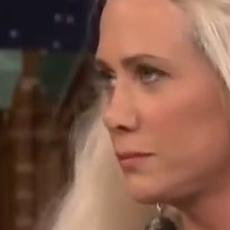

In [ ]:
image_path='/content/drive/MyDrive/Colab_Notebooks/deepfake_database/validation/real/47_516.jpg'
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread(image_path)

# Display the image (optional)
cv2_imshow( image)

In [ ]:
from tensorflow.keras.preprocessing import image

# Load an image from a file path
  # Replace with the actual file path
img = image.load_img(image_path, target_size=(128, 128))  # Adjust target_size as needed

# Preprocess the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image data if necessary

predictions = loaded_model.predict(img)
print(predictions)

class_labels = {0: "df", 1: "real"}



predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_class_label

1/1 [==============================] - 0s 43ms/step
[[0.87882525]]


'df'

1/1 [==============================] - 0s 23ms/step


array([[0.36179772]], dtype=float32)

In [ ]:
class_labels = {0: "df", 1: "real"}



predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_class_label

'df'

Validiation


In [34]:
# Example data loading using ImageDataGenerator
validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

validation_generator = validation_data_generator.flow_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/deepfake_database/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)

Found 3607 images belonging to 2 classes.


In [ ]:
validation_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_generator.class_indices

{'df': 0, 'real': 1}

In [ ]:
loss, accuracy = model.evaluate(validation_generator)

In [ ]:
model.fit(validation_generator, epochs=10)

Epoch 1/10
 66/113 [================>.............] - ETA: 6:18 - loss: 0.2862 - accuracy: 0.9173

KeyboardInterrupt: ignored

Results

In [ ]:
preds=model.predict(validation_generator)

113/113 [==============================] - 386s 3s/step


In [ ]:
preds.shape

(3607, 1)

NameError: ignored

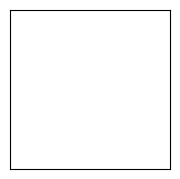

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,12))

start_loc = 250
for i in range(113):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_loc+i])
  gt = y_test[start_loc+i]

  color = 'green'
  if pred != gt:
    color = 'red'

  plt.xlabel(f'i={start_loc+i} pred={pred} gt={gt}', color=color)
  plt.imshow(x_test[start_loc+i])
plt.show()

validiation test

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(128, 128,3))  # You can adjust the target size to match your model's input size
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image data if your model requires it
    return img

In [ ]:
def predict_and_display(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_label = "Real" if prediction < 0.5 else "Deepfake"
    confidence = abs(0.5 - prediction[0, 0]) * 2  # Scale the confidence between 0 and 1

    # Display the image and prediction
    plt.imshow(cv2.imread(image_path))
    plt.title(f"Class: {class_label}, Confidence: {confidence:.2f}")
    plt.show()

1/1 [==============================] - 0s 47ms/step


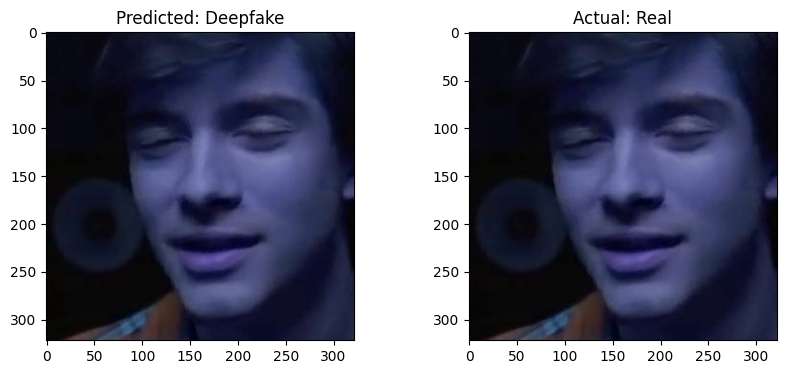

1/1 [==============================] - 0s 24ms/step


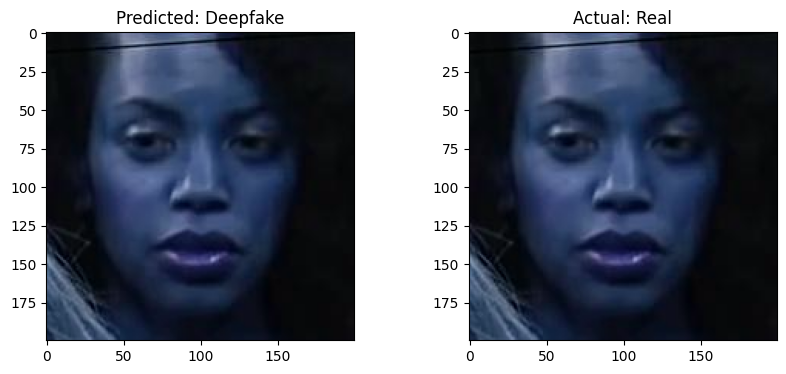

1/1 [==============================] - 0s 26ms/step


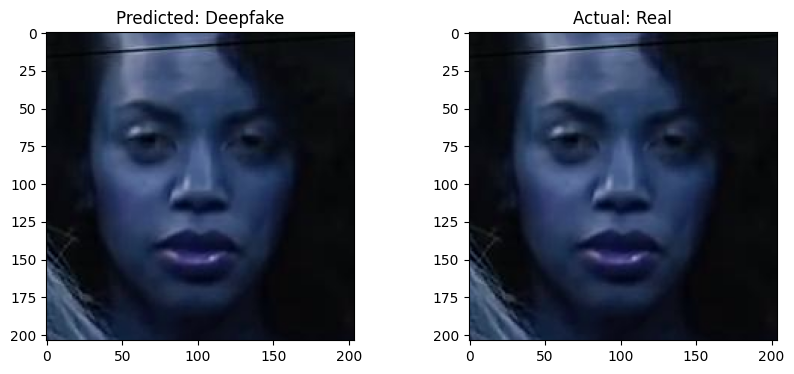

1/1 [==============================] - 0s 24ms/step


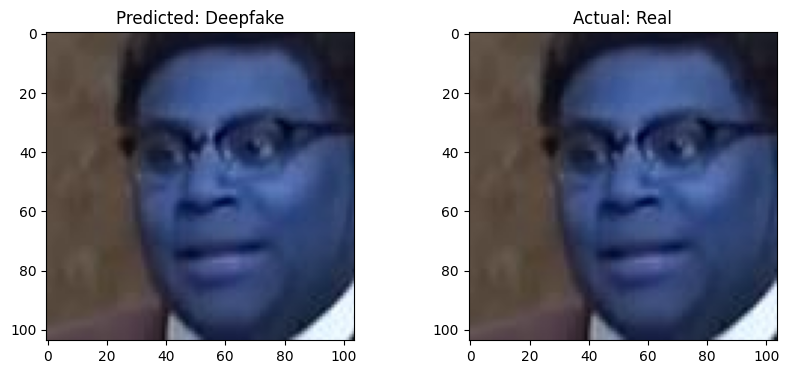

1/1 [==============================] - 0s 23ms/step


KeyboardInterrupt: ignored

In [ ]:
import os
import cv2

validation_data_dir = '/content/drive/MyDrive/Colab_Notebooks/deepfake_database/validation'

for subdir in os.listdir(validation_data_dir):
    subdir_path = os.path.join(validation_data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, file)
            img = preprocess_image(image_path)
            prediction = model.predict(img)
            predicted_class = 1 if prediction >= 0.5 else 0  # 1 for "deepfake" and 0 for "real"

            actual_class = 1 if subdir == 'deepfake' else 0  # Define the actual class based on the folder name

            if predicted_class != actual_class:
                # Display the image with both predicted and actual labels
                predicted_label = "Deepfake" if predicted_class == 1 else "Real"
                actual_label = "Deepfake" if actual_class == 1 else "Real"
                confidence = abs(0.5 - prediction[0, 0]) * 2

                # Display the image and labels
                image = cv2.imread(image_path)
                fig, ax = plt.subplots(1, 2, figsize=(10, 4))
                ax[0].imshow(image)
                ax[0].set_title(f"Predicted: {predicted_label}")
                ax[1].imshow(image)
                ax[1].set_title(f"Actual: {actual_label}")
                plt.show()

evaluating models performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
true_labels = []
predicted_labels = []

New Approach

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import load_model


In [56]:
validation_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have loaded the test data and true labels correctly

# Make predictions on the test dataset using your loaded model
test_predictions = model.predict(validation_generator)




113/113 [==============================] - 46s 409ms/step


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure that the true_labels have the same number of samples as test_predictions
true_labels = validation_generator.classes

binary_predictions = (test_predictions >= 0.5).astype(int)

# Ensure that the true_labels are already in a binary format
# If not, convert them to binary format as well

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
confusion = confusion_matrix(true_labels, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7707235930135847
Precision: 0.9524140326502257
Recall: 0.798951048951049
F1-Score: 0.86895896054508
Confusion Matrix:
[[  38  137]
 [ 690 2742]]


In [93]:

import matplotlib.pyplot as plt



In [86]:
 X,y = validation_generator.next()
 print(f"predicted likelihood: {loaded_model.predict(X)[0][0]:.4f}")
 print(f"Actual label: {int(y[0])}")
 #print(f"\nCorrect prediction : {round(loaded_model.predict(X[0][0]==y[0]))}")

 #plt.imshow(np.squeeze(X));

1/1 [==============================] - 0s 415ms/step
predicted likelihood: 0.9520
Actual label: 1


1/1 [==============================] - 0s 97ms/step
Image 1
Predicted Likelihood: 0.8722
Actual Label: 1
Correct Prediction: True


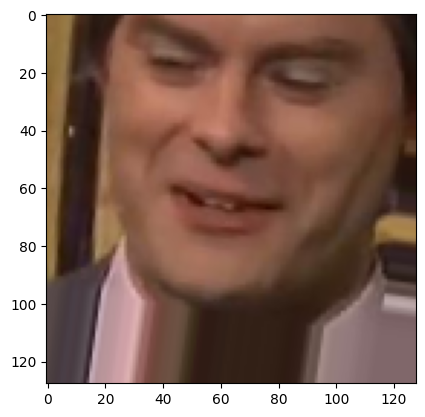

1/1 [==============================] - 0s 51ms/step
Image 2
Predicted Likelihood: 0.3617
Actual Label: 1
Correct Prediction: False


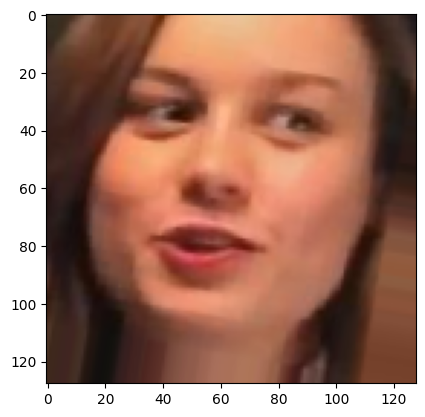

1/1 [==============================] - 0s 55ms/step
Image 3
Predicted Likelihood: 0.5647
Actual Label: 1
Correct Prediction: True


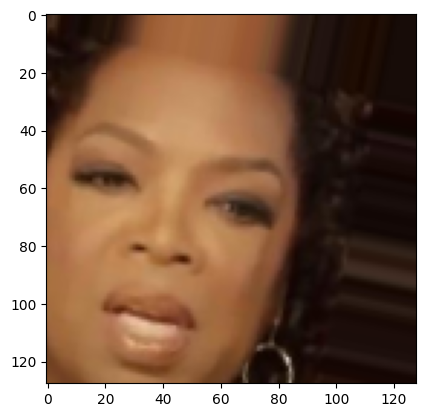

1/1 [==============================] - 0s 78ms/step
Image 4
Predicted Likelihood: 0.9235
Actual Label: 1
Correct Prediction: True


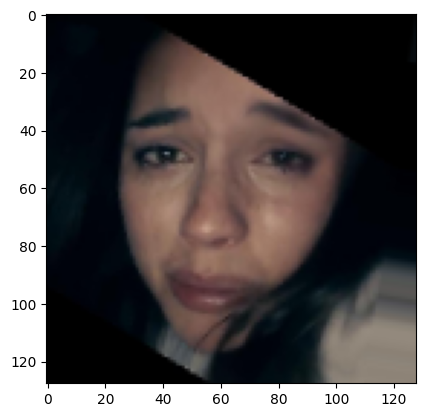

1/1 [==============================] - 0s 49ms/step
Image 5
Predicted Likelihood: 0.9961
Actual Label: 1
Correct Prediction: True


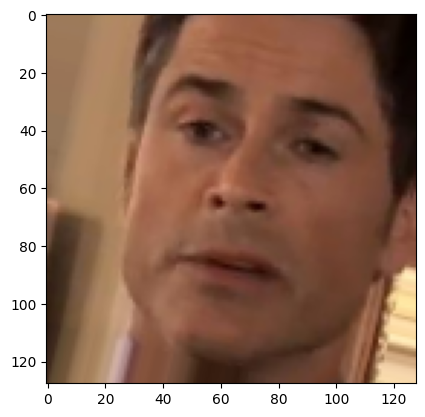

1/1 [==============================] - 0s 50ms/step
Image 6
Predicted Likelihood: 0.1823
Actual Label: 1
Correct Prediction: False


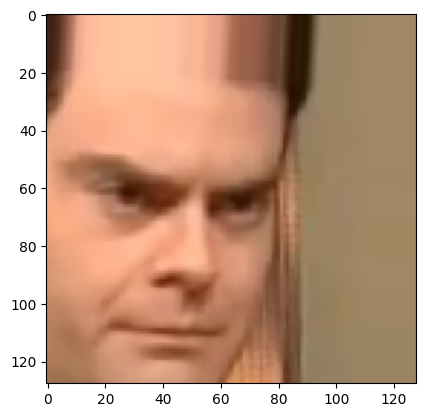

1/1 [==============================] - 0s 53ms/step
Image 7
Predicted Likelihood: 0.9474
Actual Label: 1
Correct Prediction: True


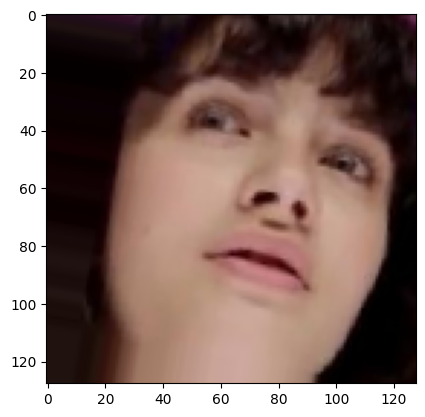

1/1 [==============================] - 0s 48ms/step
Image 8
Predicted Likelihood: 0.9667
Actual Label: 1
Correct Prediction: True


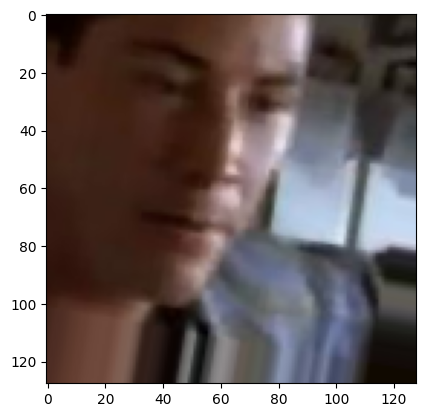

1/1 [==============================] - 0s 29ms/step
Image 9
Predicted Likelihood: 0.9986
Actual Label: 1
Correct Prediction: True


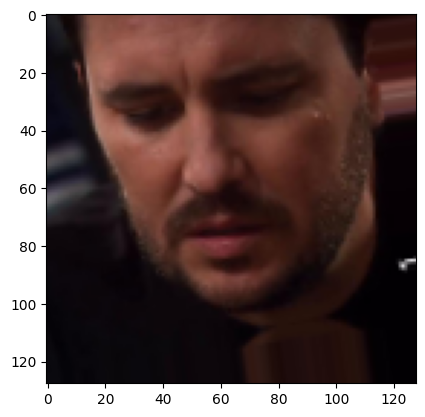

1/1 [==============================] - 0s 49ms/step
Image 10
Predicted Likelihood: 0.9172
Actual Label: 1
Correct Prediction: True


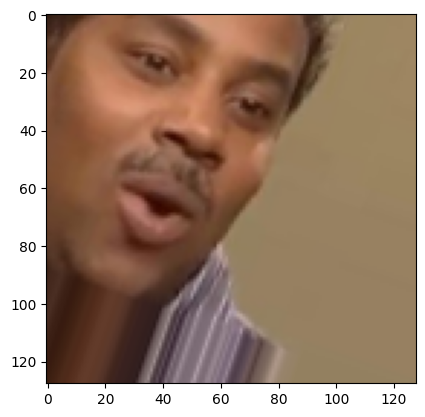

1/1 [==============================] - 0s 30ms/step
Image 11
Predicted Likelihood: 0.1703
Actual Label: 1
Correct Prediction: False


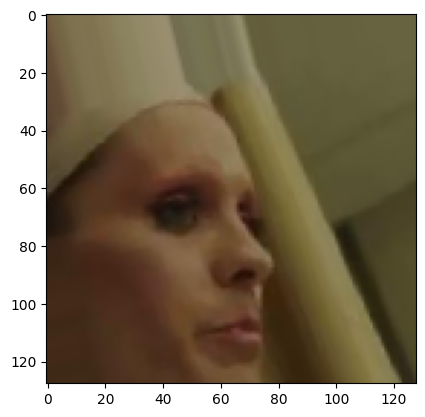

1/1 [==============================] - 0s 28ms/step
Image 12
Predicted Likelihood: 0.0209
Actual Label: 0
Correct Prediction: True


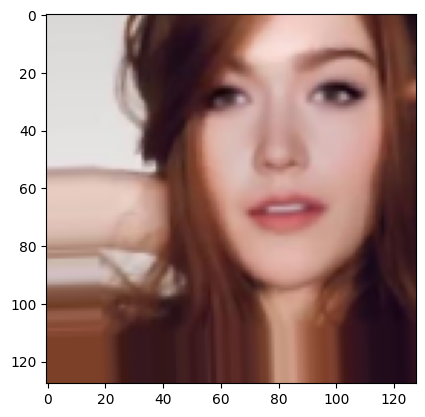

1/1 [==============================] - 0s 29ms/step
Image 13
Predicted Likelihood: 0.9814
Actual Label: 1
Correct Prediction: True


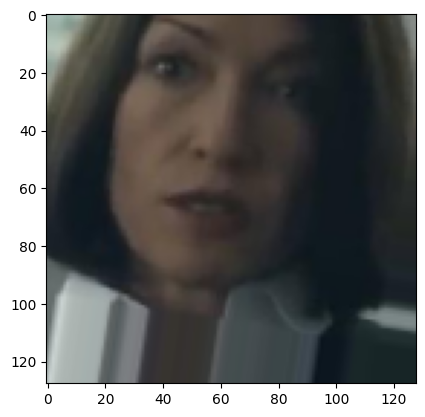

1/1 [==============================] - 0s 38ms/step
Image 14
Predicted Likelihood: 0.9682
Actual Label: 1
Correct Prediction: True


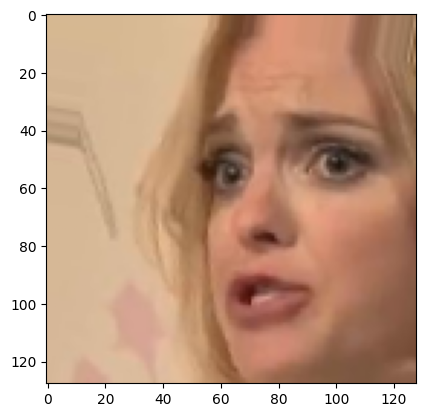

1/1 [==============================] - 0s 32ms/step
Image 15
Predicted Likelihood: 0.9947
Actual Label: 1
Correct Prediction: True


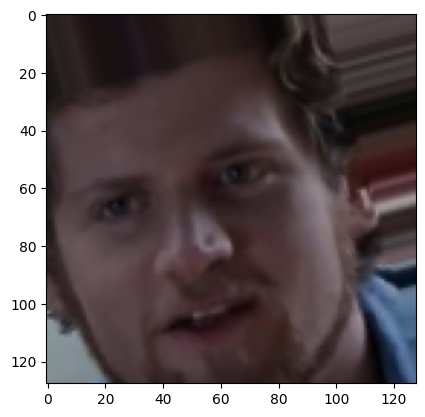

1/1 [==============================] - 0s 37ms/step
Image 16
Predicted Likelihood: 0.9892
Actual Label: 1
Correct Prediction: True


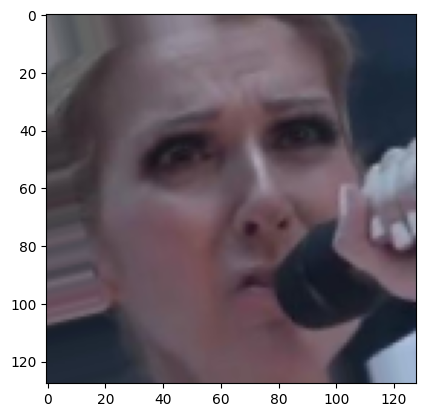

1/1 [==============================] - 0s 32ms/step
Image 17
Predicted Likelihood: 0.9996
Actual Label: 1
Correct Prediction: True


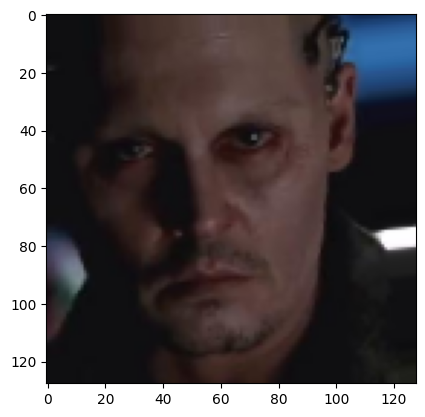

1/1 [==============================] - 0s 49ms/step
Image 18
Predicted Likelihood: 0.5548
Actual Label: 1
Correct Prediction: True


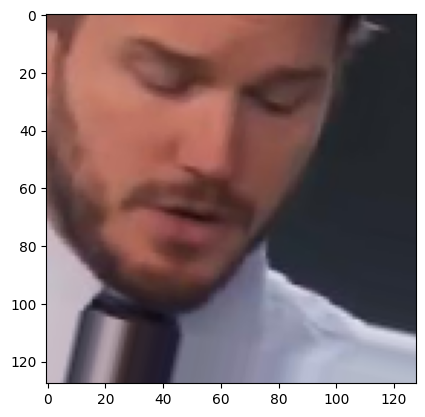

1/1 [==============================] - 0s 58ms/step
Image 19
Predicted Likelihood: 0.9951
Actual Label: 1
Correct Prediction: True


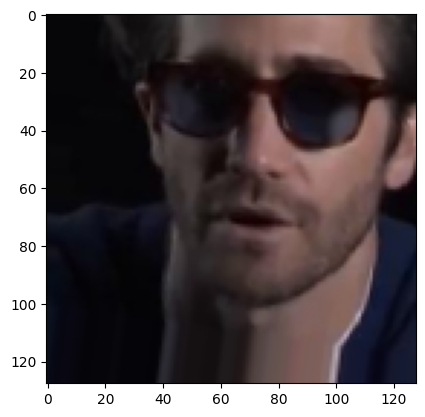

1/1 [==============================] - 0s 50ms/step
Image 20
Predicted Likelihood: 0.9781
Actual Label: 1
Correct Prediction: True


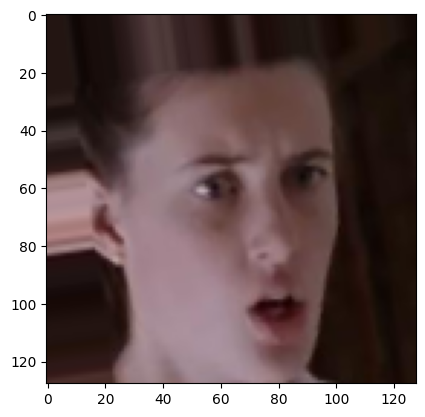

1/1 [==============================] - 0s 81ms/step
Image 21
Predicted Likelihood: 0.9653
Actual Label: 1
Correct Prediction: True


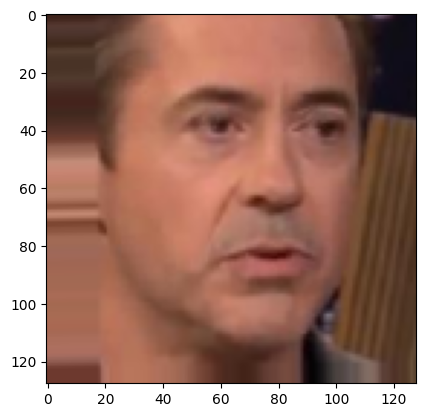

1/1 [==============================] - 0s 83ms/step
Image 22
Predicted Likelihood: 0.2179
Actual Label: 1
Correct Prediction: False


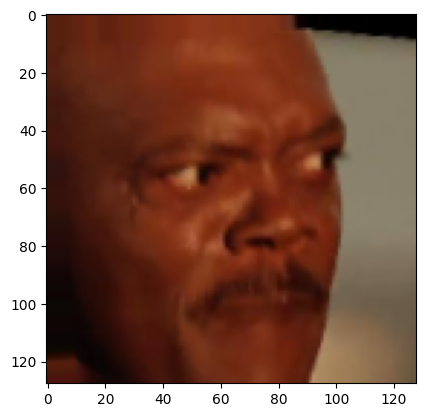

1/1 [==============================] - 0s 72ms/step
Image 23
Predicted Likelihood: 0.0025
Actual Label: 1
Correct Prediction: False


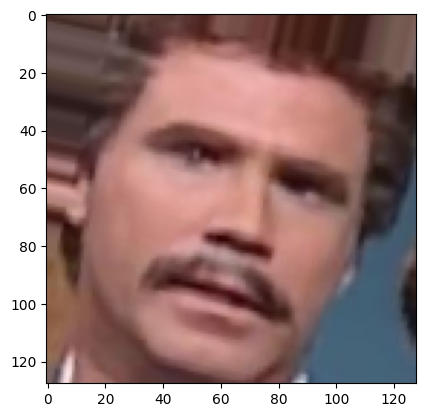

1/1 [==============================] - 0s 43ms/step
Image 24
Predicted Likelihood: 0.9454
Actual Label: 1
Correct Prediction: True


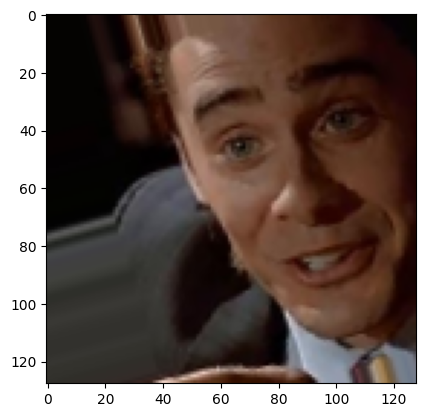

1/1 [==============================] - 0s 42ms/step
Image 25
Predicted Likelihood: 0.4849
Actual Label: 1
Correct Prediction: False


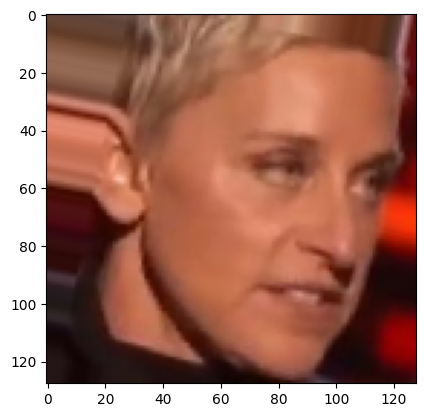

1/1 [==============================] - 0s 65ms/step
Image 26
Predicted Likelihood: 1.0000
Actual Label: 1
Correct Prediction: True


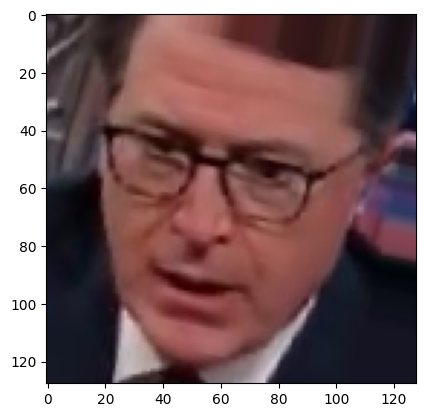

1/1 [==============================] - 0s 58ms/step
Image 27
Predicted Likelihood: 0.0351
Actual Label: 1
Correct Prediction: False


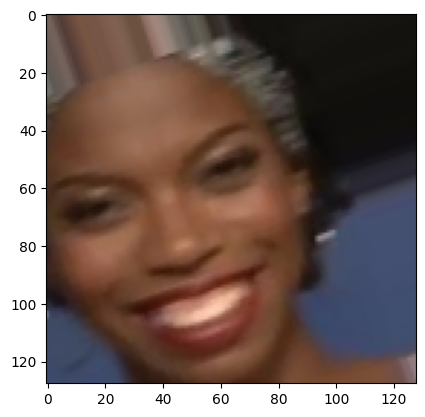

1/1 [==============================] - 0s 63ms/step
Image 28
Predicted Likelihood: 0.9692
Actual Label: 1
Correct Prediction: True


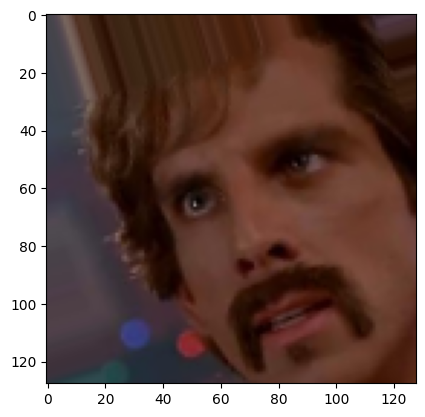

1/1 [==============================] - 0s 66ms/step
Image 29
Predicted Likelihood: 0.9999
Actual Label: 1
Correct Prediction: True


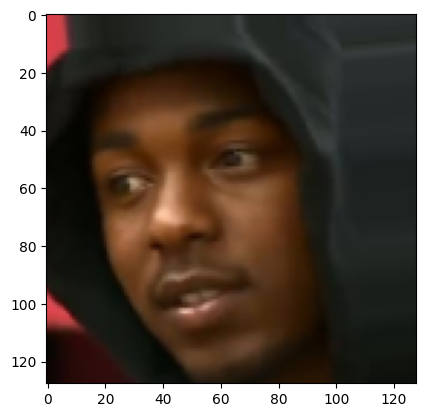

1/1 [==============================] - 0s 43ms/step
Image 30
Predicted Likelihood: 0.9978
Actual Label: 1
Correct Prediction: True


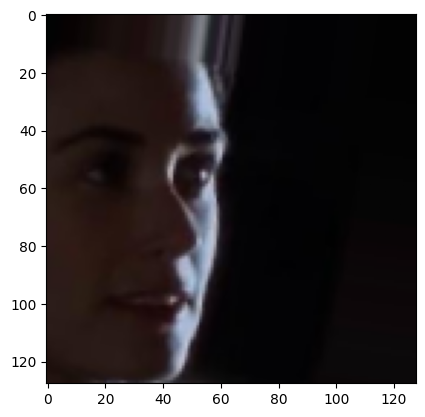

1/1 [==============================] - 0s 40ms/step
Image 31
Predicted Likelihood: 0.9755
Actual Label: 1
Correct Prediction: True


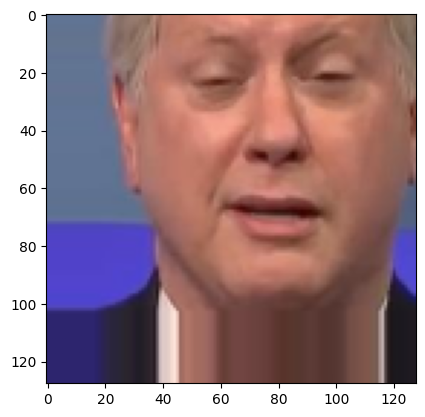

1/1 [==============================] - 0s 40ms/step
Image 32
Predicted Likelihood: 0.6383
Actual Label: 1
Correct Prediction: True


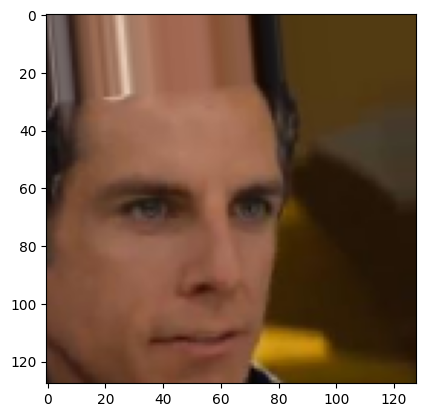

In [87]:
X, y = validation_generator.next()

# Iterate through the batch of images
for i in range(X.shape[0]):
    # Get an individual image and label from the batch
    single_image = X[i]
    single_label = int(y[i])

    # Make a prediction for the individual image
    predicted_likelihood = loaded_model.predict(single_image.reshape(1, 128, 128, 3))[0][0]

    # Print the results for the individual image
    print(f"Image {i + 1}")
    print(f"Predicted Likelihood: {predicted_likelihood:.4f}")
    print(f"Actual Label: {single_label}")
    print(f"Correct Prediction: {round(predicted_likelihood) == single_label}")

    # Display the individual image
    plt.figure()
    plt.imshow(np.squeeze(single_image))
    plt.show()

1/1 [==============================] - 0s 24ms/step


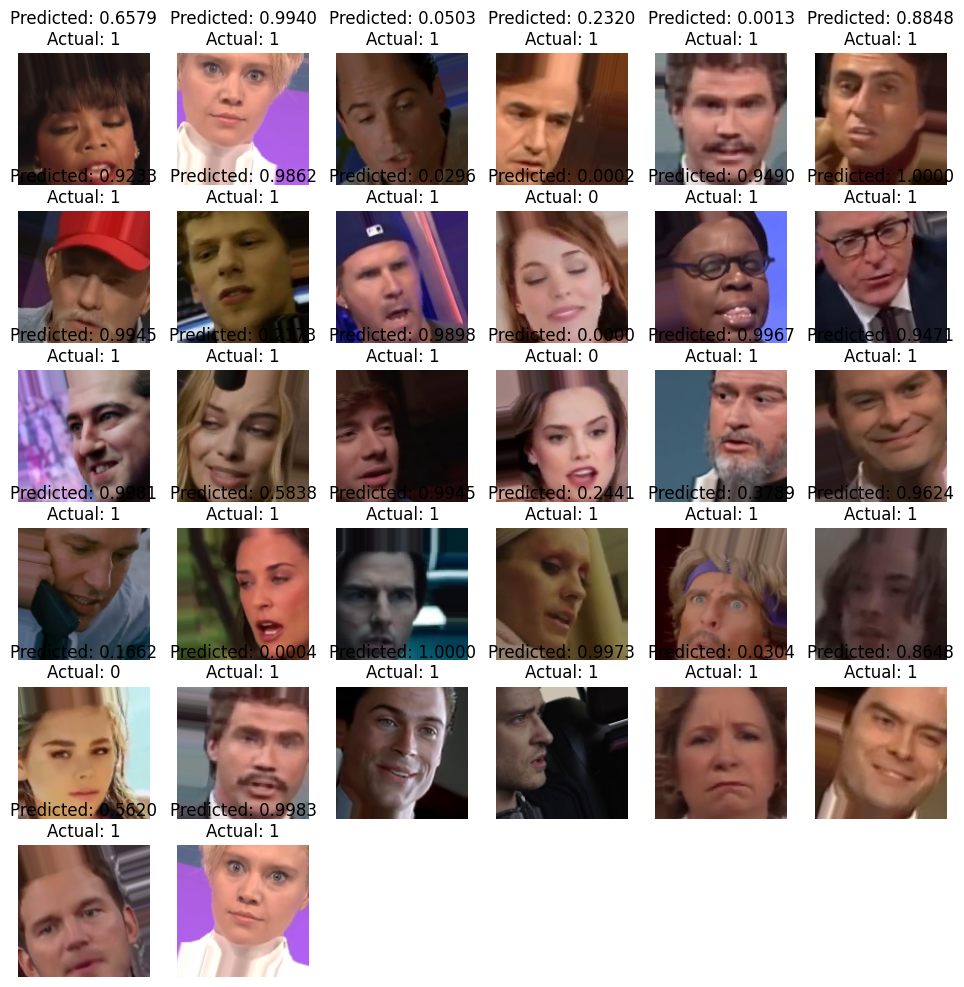

In [92]:
import math

X, y = validation_generator.next()
batch_size = X.shape[0]

# Calculate the number of rows and columns for the grid
rows = int(math.ceil(math.sqrt(batch_size)))
columns = int(math.ceil(batch_size / rows))

# Create a grid of subplots
fig, axes = plt.subplots(rows, columns, figsize=(12, 12))

# Iterate through the batch of images
for i in range(batch_size):
    # Get an individual image and label from the batch
    single_image = X[i]
    single_label = int(y[i])

    # Make a prediction for the individual image
    predicted_likelihood = loaded_model.predict(single_image.reshape(1, 128, 128, 3))[0][0]

    # Calculate the subplot position
    row = i // columns
    col = i % columns

    # Plot the image and add labels
    ax = axes[row, col]
    ax.imshow(np.squeeze(single_image))
    ax.set_title(f"Predicted: {predicted_likelihood:.4f}\nActual: {single_label}")
    ax.axis('off')

# Remove empty subplots, if any
for i in range(batch_size, rows * columns):
    fig.delaxes(axes.flatten()[i])

plt.show()